**Required Libraries**

In [51]:
import scipy
import sys  
from scipy.signal import filtfilt
from scipy import stats
from scipy import signal
from scipy import pi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io.wavfile import write
from scipy.signal import butter, lfilter, freqz   

**band-pass filter**

In [7]:
def bandpassfilter(signal):
  fs = 4000.0 #sampling_frequency
  low_cut = 20.0 #lower_range
  high_cut = 50.0 #higher_range
  nyq = 0.5 * fs #Nyquist frequency

  low = low_cut / nyq
  high = high_cut / nyq
  order = 2 #filter_order

  b, a = scipy.signal.butter(order, [low, high], 'bandpass', analog= False)
  y = scipy.signal.filtfilt(b,a, signal, axis = 0)
  return (y)

In [8]:
def plot():
  data = pd.read_csv("/content/drive/MyDrive/SIGNAL ANALYSIS/Active_Relax_dataset.csv")
  data = np.array(data)
  time = np.linspace(0, 1, len(data))
  plt.plot(time, data)
  plt.show()

  filtered_signal = bandpassfilter(data)
  plt.plot(time, filtered_signal)

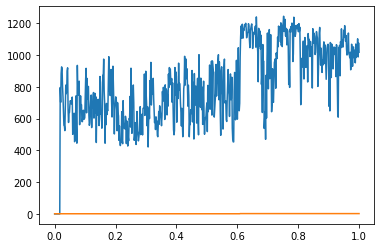

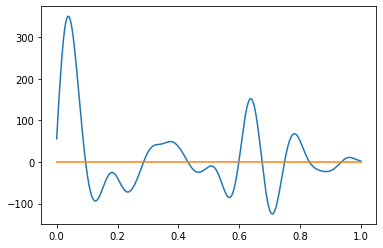

In [ ]:
plot()

**Lowpass Filter**

In [3]:
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [13]:
# Filter requirements.
order = 2
fs = 4000      # sample rate, Hz
cutoff = 3  # desired cutoff frequency of the filter, Hz

In [22]:
def plot():
  data = pd.read_csv("/content/drive/MyDrive/SIGNAL ANALYSIS/Active_Relax_dataset.csv")
  data = np.array(data)
  time = np.linspace(0, 1, len(data))
  plt.plot(time, data)
  plt.show()

  filtered_signal = butter_lowpass_filter(data, cutoff, fs, order)
  plt.plot(time, filtered_signal)

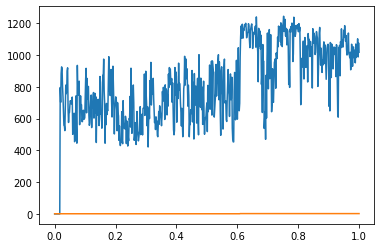

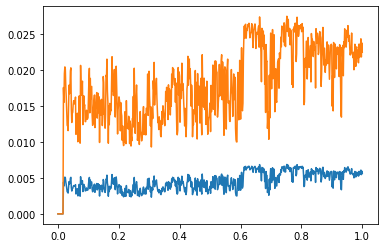

In [23]:
plot()

**High-pass Filter**

In [31]:
# ----- ----- ----- -----    
def butter_highpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

In [47]:
def butter_highpass_filter(data, cutoff, fs, order):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [48]:
# Filter requirements.
order = 6
fs = 300.0  # sample rate, Hz
cutoff = 10  # desired cutoff frequency of the filter, Hz

In [49]:
def plot():
  data = pd.read_csv("/content/drive/MyDrive/SIGNAL ANALYSIS/Active_Relax_dataset.csv")
  data = np.array(data)
  time = np.linspace(0, 1, len(data))
  plt.plot(time, data)
  plt.show()

  filtered_signal = butter_highpass_filter(data, cutoff, fs, order=5)
  plt.plot(time, filtered_signal)

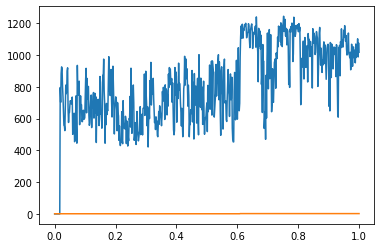

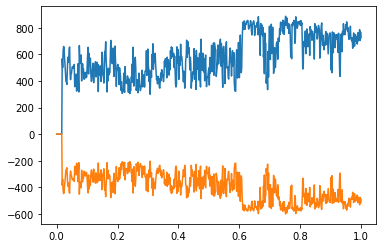

In [50]:
plot()